# MNIST HANDWRITTEN DIGIT RECOGNITION

- The dataset was constructed from a number of scanned document dataset available from the National Institute of Standards and Technology (NIST). This is where the name for the dataset comes from, as the Modified NIST or MNIST dataset.

- Images of digits were taken from a variety of scanned documents, normalized in size and centered. This makes it an excellent dataset for evaluating models, allowing the developer to focus on the machine learning with very little data cleaning or preparation required.

- Each image is a 28 by 28 pixel square (784 pixels total). A standard split of the dataset is used to evaluate and compare models, where 60,000 images are used to train a model and a separate set of 10,000 images are used to test it.

- It is a digit recognition task. As such there are 10 digits (0 to 9) or 10 classes to predict. Results are reported using prediction error, which is nothing more than the inverted classification accuracy.

#### In this notebook you will learn the MNIST handwritten digit recognition problem and deep learning models developed in Python using the Keras library that are capable of achieving excellent results.

#### Working through this tutorial you will learn:

- How to load the MNIST dataset in Keras and generate plots of the dataset.
- How to reshape the MNIST dataset and develop a simple but well performing multi-layer perceptron model on the problem.
- How to use Keras to create convolutional neural network models for MNIST.
- How to develop and evaluate larger CNN models for MNIST capable of near world class results.

## Artificial Neural Network (ANN)

An artificial neural network is a mathematical model that converts a set of inputs to a set of outputs through a number of hidden layers. An ANN works with hidden layers, each of which is a transient form associated with a probability. In a typical neural network, each node of a layer takes all nodes of the previous layer as input. A model may have one or more hidden layers.

![NN structure](images/ANN.jpg)

ANNs receive an input layer to transform it through hidden layers. An ANN is initialized by assigning random weights and biases to each node of the hidden layers. As the training data is fed into the model, it modifies these weights and biases using the errors generated at each step. Hence, our model “learns” the pattern when going through the training data.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

%reload_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')


In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

Using TensorFlow backend.


### We'll use the keras library for training the model in this tutorial. Keras is a high-level library in Python that is a wrapper over TensorFlow, CNTK and Theano. By default, Keras uses a TensorFlow backend by default, and we’ll use the same to train our model.

In [3]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

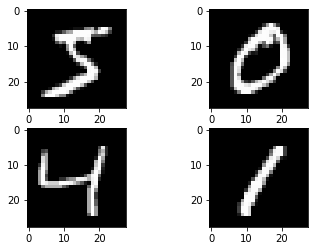

In [4]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

## Cleaning Data

Now that we have seen the structure of the data, we are ready to create the model.
To work with the Keras API, we need to reshape each image to the format of (M x N x 1). We’ll use the .reshape() method to perform this action. Finally, normalize the image data by dividing each pixel value by 255 (since RGB value can range from 0 to 255):

In [7]:
# input color dimentions
img_rows, img_cols = 28, 28

num_pixels = img_rows * img_cols

x_train = x_train.reshape((x_train.shape[0], num_pixels)).astype(float)
x_test = x_test.reshape((x_test.shape[0], num_pixels)).astype(float)

# normalize inputs from 0-255 to 0-1
x_train /= 255
x_test /= 255


### Let us now convert the label integers into binary class using ``` to_categorical() ``` function

In [8]:
# from keras.utils import to_categorical

num_classes = 10

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

## Designing the model

This is the most important step in this notebook as it the accuracy is determined by how well we have defined the model.
For this tutorial, we have used [Keras Documentation design](https://keras.io/examples/vision/mnist_convnet/) 

Keras provides us with two different types of model, first the Sequential model (which we'll be using in this tutorial) and the other being Functional Model.
The sequential API allows you to create models layer-by-layer for most problems. Alternatively, the functional API allows you to create models that have a lot more flexibility as you can easily define models where layers connect to more than just the previous and next layers.

For further learning purpose : Read [this](https://medium.com/@hanify/sequential-api-vs-functional-api-model-in-keras-266823d7cd5e) & [this](https://www.deeplearningdemystified.com/article/pdl-1) (I personally find this one really interesting and useful)


In [9]:
# baseline model : Neural Network
def nn_model():
    
    # create model
    nn = Sequential()
    nn.add(Dense(num_pixels, activation = 'relu', kernel_initializer = 'normal', input_dim = num_pixels))
    nn.add(Dense(128, activation = 'relu', kernel_initializer = 'normal'))
    nn.add(Dense(num_classes, activation = 'softmax', kernel_initializer = 'normal'))
    
    # compile model
    nn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return nn

In [10]:
batch_size = 128
epochs = 10

# build the model
model = nn_model()

print(model.summary())

# Fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size, verbose=2)

# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', round(scores[0]*100, 2))
print('Test accuracy:', round(scores[1]*100, 2))
model.save("test_nn.h5")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 717,210
Trainable params: 717,210
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
469/469 - 4s - loss: 0.2516 - accuracy: 0.9272 - val_loss: 0.1076 - val_accuracy: 0.9696
Epoch 2/10
469/469 - 5s - loss: 0.0879 - accuracy: 0.9732 - val_loss: 0.0874 - val_accuracy: 0.9714
Epoch 3/10
469/469 - 5s - loss: 0.0529 - accuracy: 0.9836 - val_loss: 0.0694 - val_accuracy: 0.9763
Epoch 4/10
469/469 - 5s - loss: 0.0363 - accuracy: 0.9893 - val_loss: 0.072

## Convoluted Neural Networks (CNN)

In a CNN, the images are represented as 3-D array with the 3rd dimension containing the color(RGB). Consequently, a node of the hidden layer would only be connected to a small region in the vicinity of the corresponding input layer, making the process far more efficient than a traditional neural network. CNNs, therefore, are popular when it comes to working with images and videos.

![Basic CNN MNIST Model](images/cnn-procedure.png)

The various types of layers in a CNN are as follows:
- **convolutional layers** : these run input through certain filters, which identify features in the image
- **pooling layers**: these combine convolutional features, helping in feature reduction
- **flatten layers**: these convert an N-dimentional layer to a 1D layer
- **classification layer**: the final layer, which tells us the final result.

In [11]:
# load data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reshape to be [samples][width][height][channels]
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1).astype('float32')


# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

num_classes = 10

In [12]:
# define CNN model : Neural network with CNN

def cnn_model():
    
    # create model
    cnn = Sequential()
    cnn.add(Conv2D(30, (5, 5), input_shape=(img_rows, img_cols, 1), activation='relu'))
    cnn.add(MaxPooling2D())
    cnn.add(Conv2D(15, (3, 3), activation='relu'))
    cnn.add(MaxPooling2D())
    cnn.add(Dropout(0.2))
    cnn.add(BatchNormalization())
    cnn.add(Flatten())
    
    cnn.add(Dense(128, activation = 'relu'))
    cnn.add(Dense(64, activation = 'relu'))
    cnn.add(Dense(num_classes, activation='softmax'))
    
    # compile model
    cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return cnn

In [13]:
batch_size = 128
epochs = 10

# build the model
model = cnn_model()

print(model.summary())

# Fit the model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs, batch_size=batch_size, verbose=2)

# Final evaluation of the model
scores = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', round(scores[0]*100, 2))
print('Test accuracy:', round(scores[1]*100, 2))
model.save("test_cnn.h5")

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 15)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 5, 5, 15)          60        
_________________________________________________________________
flatten (Flatten)            (None, 375)              